#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [14]:
df = pd.read_csv('data/insurance.csv')

#### Show Top 5 Records

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### Shape of the dataset

In [16]:
df.shape

(1338, 7)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [17]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [19]:
df.duplicated().sum()

1

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [20]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.4 Checking the number of unique values of each column

In [21]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

### 3.5 Check statistics of data set

In [22]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### 3.7 Exploring Data

In [23]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [24]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())



Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']


In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [26]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

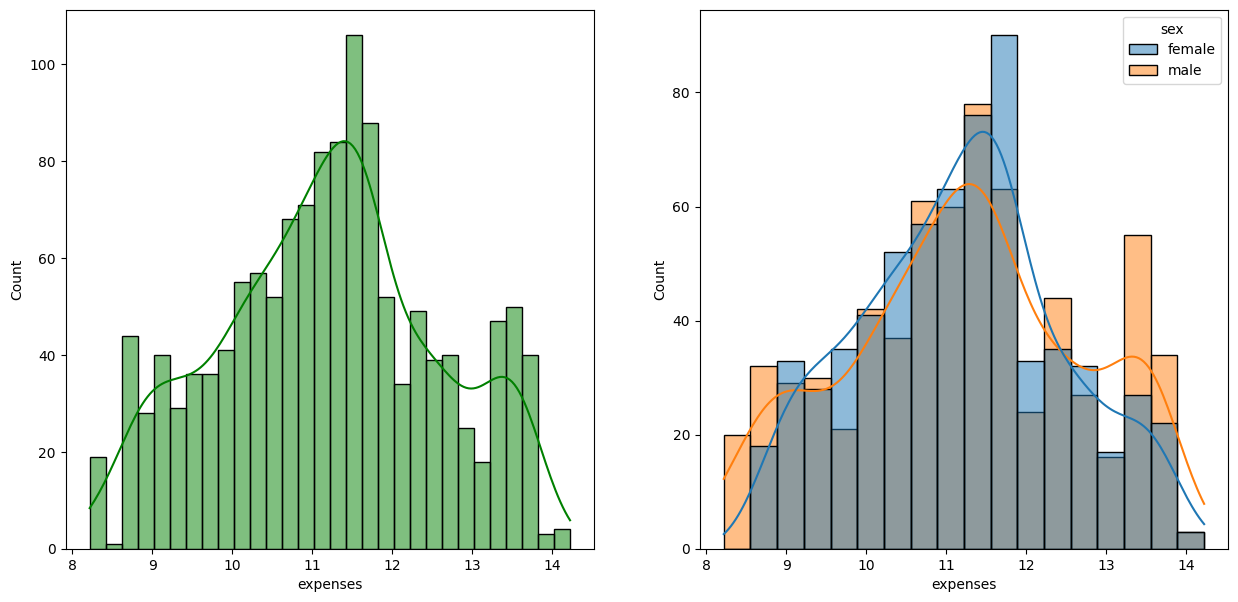

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='expenses',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='expenses',kde=True,hue='sex')
plt.show()

Original skewness: 1.5141797167430497
Transformed skewness: -0.008724267411749724


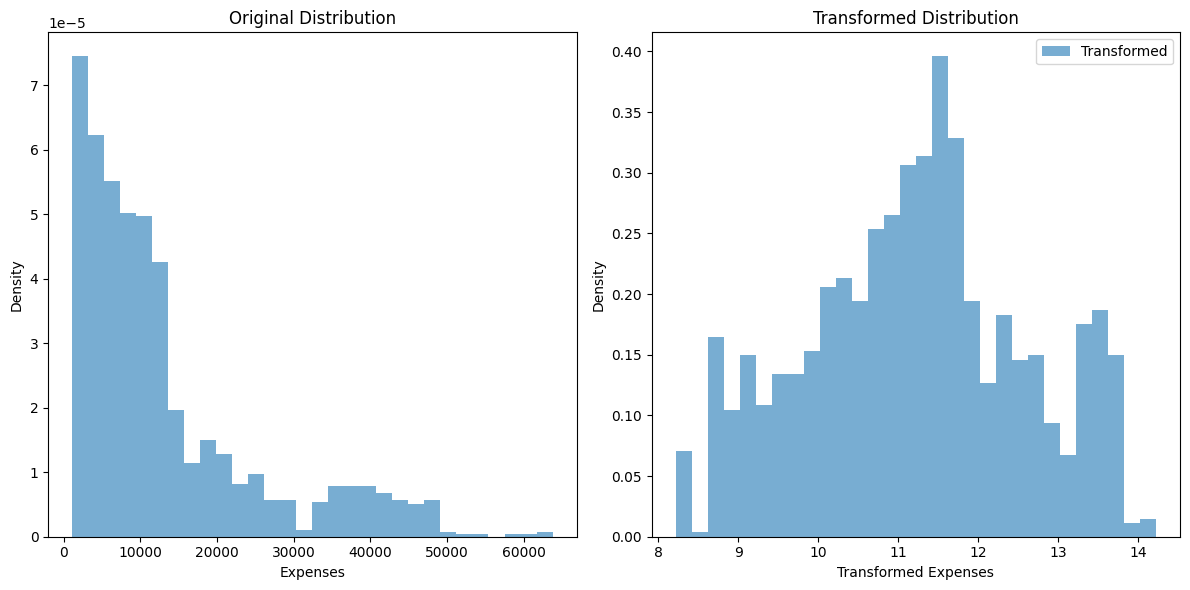

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox



# Calculate the skewness of the original data
original_skewness = skew(df['expenses'])
print("Original skewness:", original_skewness)

# Apply the Box-Cox transformation to correct the skewness
transformed_data, lambda_value = boxcox(df['expenses'])

# Calculate the skewness of the transformed data
transformed_skewness = skew(transformed_data)
print("Transformed skewness:", transformed_skewness)

# Plot histograms for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['expenses'], bins=30, density=True, alpha=0.6, label='Original')
plt.xlabel('Expenses')
plt.ylabel('Density')
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, density=True, alpha=0.6, label='Transformed' )
plt.xlabel('Transformed Expenses')
plt.ylabel('Density')
plt.title('Transformed Distribution')
df['expenses'] = transformed_data
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
df.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,12.128978


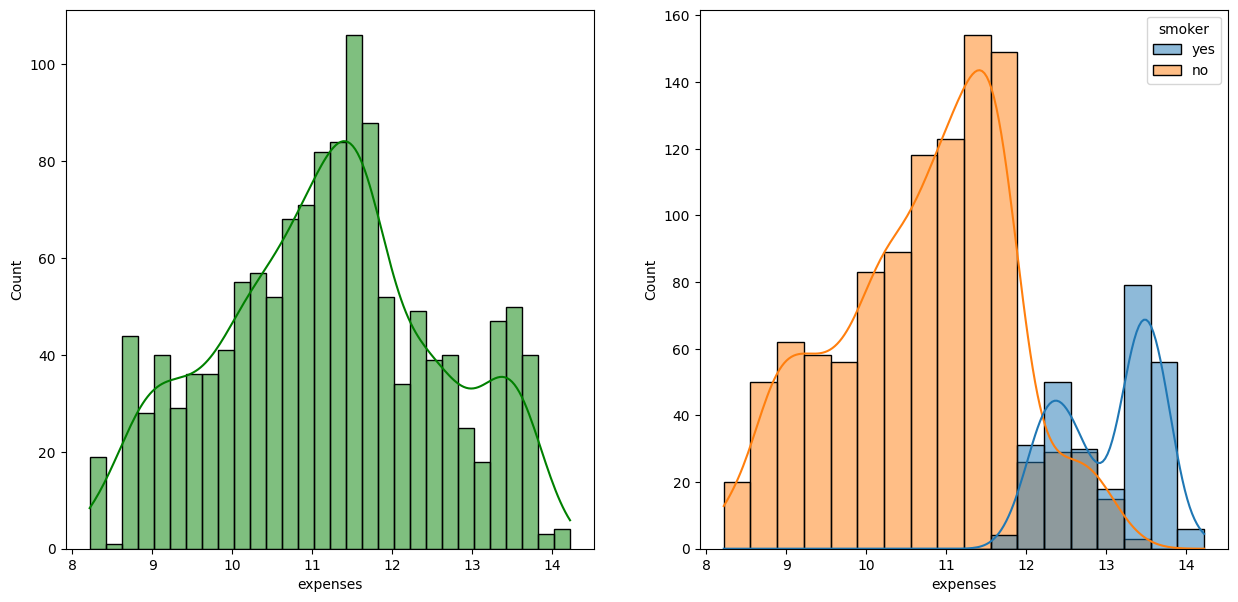

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='expenses',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='expenses',kde=True,hue='smoker')
plt.show()

In [ ]:
# smokers insurance preemium are higher as compared to no smokers

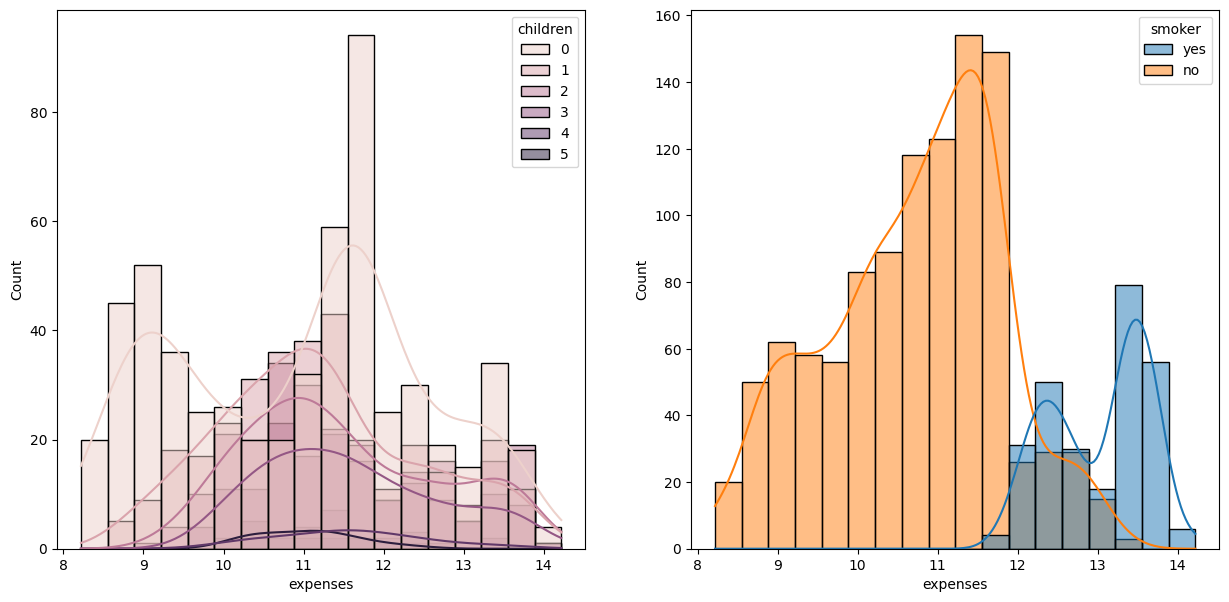

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='expenses',kde=True,hue='children')
plt.subplot(122)
sns.histplot(data=df,x='expenses',kde=True,hue='smoker')
plt.show()

#### 4.3 Multivariate analysis using pieplot

In [35]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

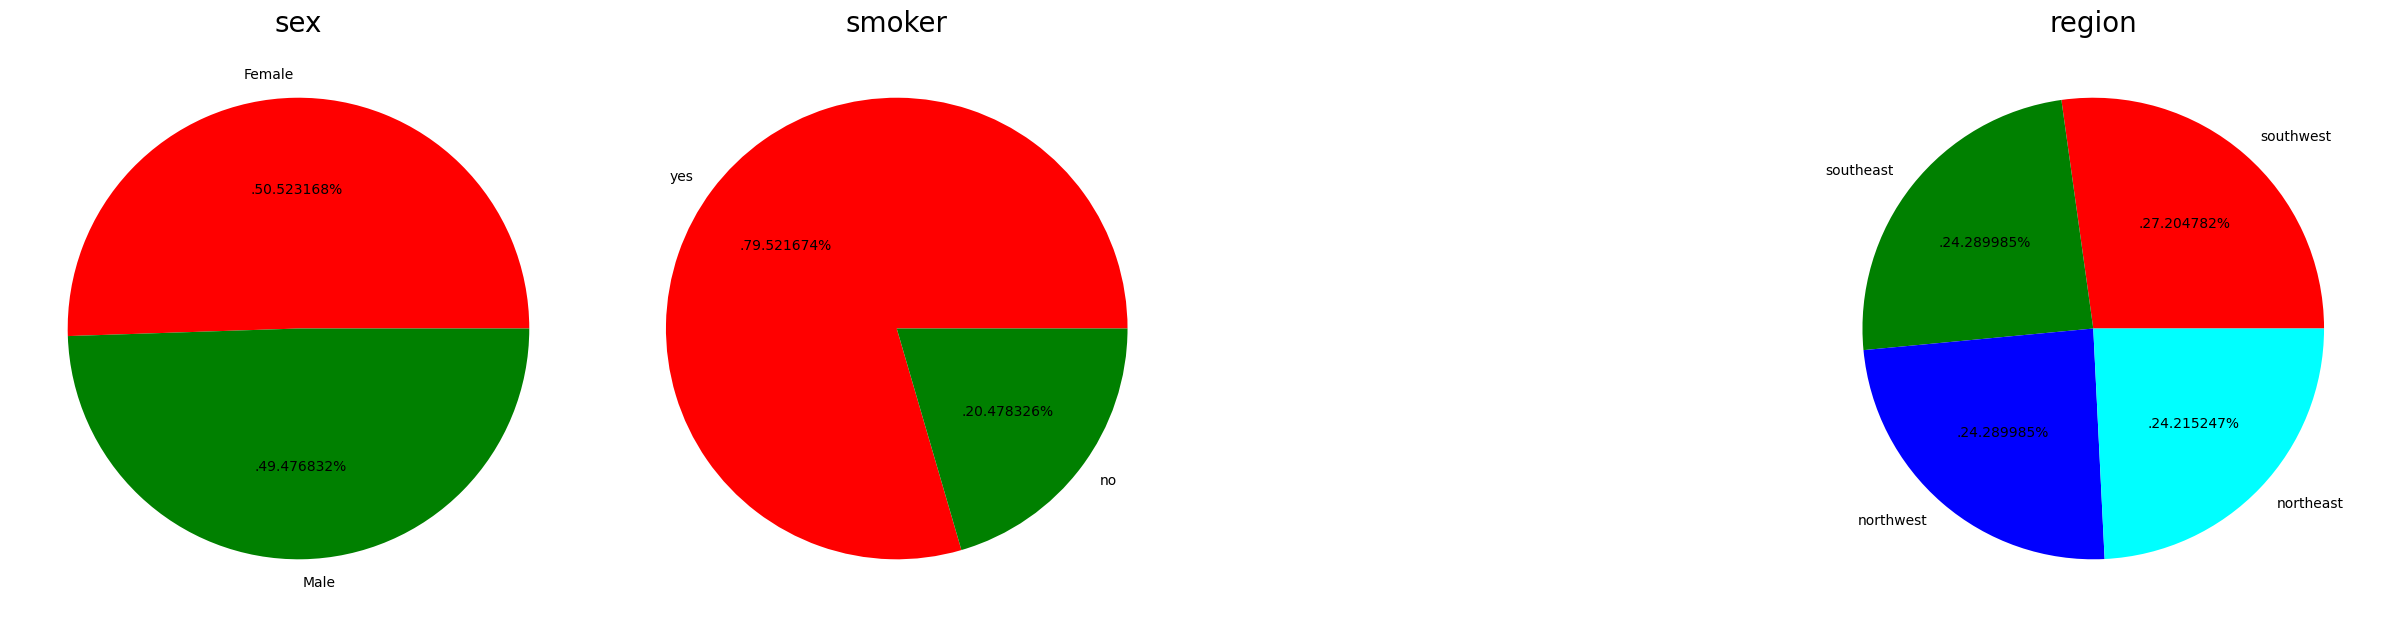

In [37]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['smoker'].value_counts()
labels = 'yes' , 'no'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('smoker', fontsize = 20)
plt.axis('off')





plt.subplot(1, 5, 4)
size = df['region'].value_counts()
labels = 'southwest', 'southeast', 'northwest', 'northeast'
color = ['red','green' , 'blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('region', fontsize = 20)
plt.axis('off')




plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number of smokers are more as compared to non smokers
- Each region have almost equal no of insurance holders

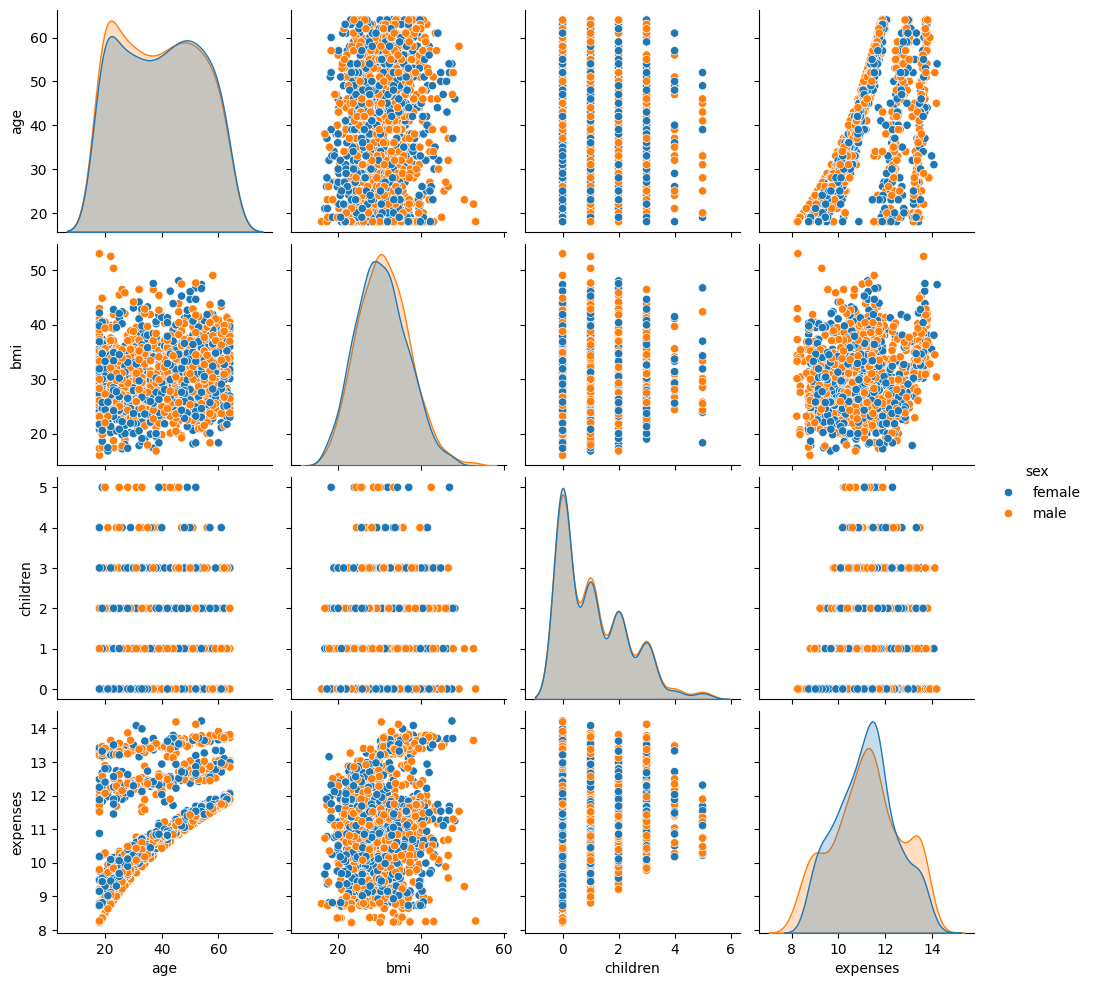

In [39]:
sns.pairplot(df,hue = 'sex')
plt.show()